## A model to predict species of a flower sample (Iris) based on the sizes of its petals and sepals !

In [40]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
samples, features = iris.data.shape
print(list(iris.target_names))
print(samples)
print(features)
iris.data[:5]

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
150
4


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### This is a dataset belongs to 3 species of Iris flower:  
Categories: Setosa, Versicolor, Virginica<br>
Samples: 150 (will be distributed to test and training set later)<br>
Features: Sepal.length, Sepal.width, Petal.length, Petal.width

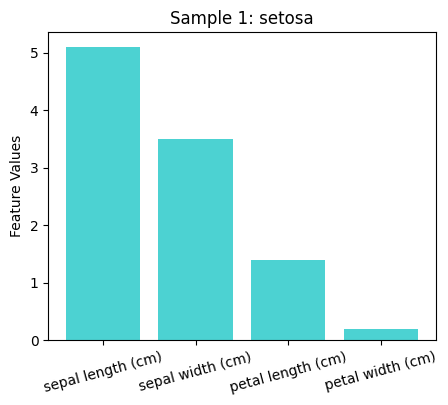

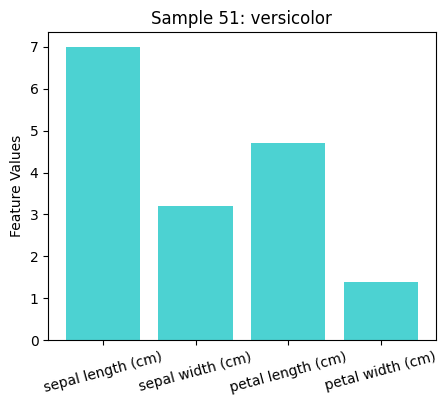

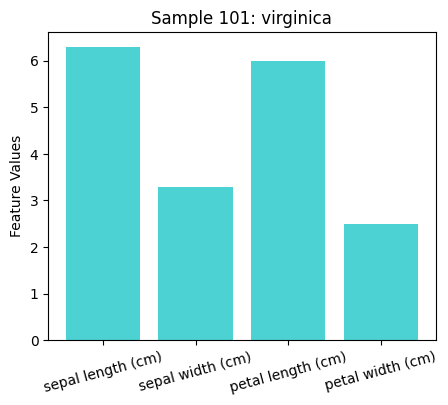

In [41]:
data = iris.data  # Features: sepal length, sepal width, petal length, petal width
target = iris.target  # Labels: 0, 1, 2 (setosa, versicolor, virginica), ex: [0,2,0,1,2,2,...,1]

target_names = iris.target_names  # Class names

# Find indices of one sample for each class
indices = []
for class_label in range(3):  # Loop over classes 0, 1, 2
    index = list(target).index(class_label)  # Find the first occurrence of each class
    indices.append(index)

# Plot the selected samples
for idx in indices:
    plt.figure(figsize=(5, 4))
    plt.bar(iris.feature_names, data[idx], color='c', alpha=0.7)
    plt.title(f"Sample {idx + 1}: {target_names[target[idx]]}")
    plt.ylabel("Feature Values")
    plt.xticks(rotation=15)
    plt.show()

Deviding out data into 20% reserved for testing our model, and the remaining 80% for training. X for features (petal/sepal size) and y for labels (the species) 

In [42]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [43]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

### Define hyperparameters to be tuned, softmax function is used for this multiple classification problem. 

In [44]:
param = {
    'max_depth': 4,
    'eta': 0.3,    #Learning rate
    'objective': 'multi:softmax',
    'num_class': 3}
epochs = 10

### Train the model with XGB

In [45]:
model = xgb.train(param, train, epochs)

In [46]:
predictions = model.predict(test)
predictions = predictions.astype(int)

### Prediction Result

In [47]:
species = ["Setosa", "Versicolor", "Virginica"]
species_predictions = [species[pred] for pred in predictions]
print(species_predictions)
print(predictions)

['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa']
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Check the accuracy on the test data

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

##### This is a perfect result - 100%. However this is not only because XGBoost is very efficient but we also working with a small dataset which make it easier to get 100% accuracy ( this wont be seen oftenly in real-world model with larger dataset ! )